<a href="https://colab.research.google.com/github/anaghasanthoshh/LearningTensorFlow/blob/main/Regression_Problem_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

print(tf.__version__)


2.17.1


In [3]:
data=pd.read_csv('https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv')

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data preprocessing:

In [11]:
df=pd.get_dummies(data,dtype='int')
#if datatype not mentioned,provides boolean values
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [12]:
X=df.drop('charges',axis=1)
y=df['charges']

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,shuffle=True,random_state=125)

In [18]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((936, 11), (936,), (402, 11), (402,))

In [68]:
#create the model
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(keras.layers.Dense(15,input_dim=11,activation='relu'))
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(1,activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
#compile the model
model.compile(optimizer='adam',loss='mae')

In [70]:
early_stopping=keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0,
    patience=0,
    verbose=1,
    mode='min',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [72]:
model.fit(X_train,y_train,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5948.9038
Epoch 2/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5934.0464
Epoch 3/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5922.0488
Epoch 4/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5908.3887
Epoch 5/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5893.8643
Epoch 6/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5879.1572
Epoch 7/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5864.5596
Epoch 8/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5851.2007
Epoch 9/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5836.0083
Epoch 10/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5821.0361
Epoch 11/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5806.5439
Epoch 12/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5791.4800
Epoch 13/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5775.8696
Epoch 14/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5760.3418
Epoch 15/1000
9

In [41]:
#evaluate results on test data
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3406.6177 


3566.049072265625

In [42]:
#What is our mean and median:
y_train.median(),y_train.mean()

#Our model is off by 3000.Significantly higher!

(9333.014350000001, 13188.82662684829)

In [43]:
#To improve our model,lets train longer:
model.fit(X_train,y_train,batch_size=10,epochs=200,callbacks=early_stopping)

Epoch 1/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3530.3818
Epoch 2/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3529.4504
Epoch 3/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3529.5684
Epoch 4/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3527.1377
Epoch 5/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3527.0925
Epoch 6/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3526.0300
Epoch 7/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3524.4482
Epoch 8/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3524.5791
Epoch 9/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3523.4270
Epoch 10/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3521.6758
Epoch 11/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3521.6982
Epoch 12/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3519.8379
Epoch 13/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3517.5732
Epoch 14/1000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3517.3005
Epoch 15/1000
9

In [90]:
tf.random.set_seed(42)
model2=tf.keras.Sequential()
model2.add(keras.layers.Dense(8,input_dim=11,activation='relu'))
model2.add(keras.layers.Dense(50,activation='relu'))
model2.add(keras.layers.Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model2.compile(optimizer='adam',loss='mae')

In [92]:
history=model2.fit(X_train,y_train,epochs=300,batch_size=10)

Epoch 1/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13212.0107
Epoch 2/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13122.7266
Epoch 3/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12696.0791
Epoch 4/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11557.9082
Epoch 5/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9679.9570
Epoch 6/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8001.3721
Epoch 7/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7448.4653
Epoch 8/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7373.5312
Epoch 9/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7347.7280
Epoch 10/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7326.4473
Epoch 11/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7305.5991
Epoch 12/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7285.2256
Epoch 13/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7264.9512
Epoch 14/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7245.1313
Epoch 15/300
94/94 ━━━━━━

In [93]:
model2.evaluate(X_test,y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2915.2134  


2962.288330078125

Text(0, 0.5, 'Mean Absolute Error')

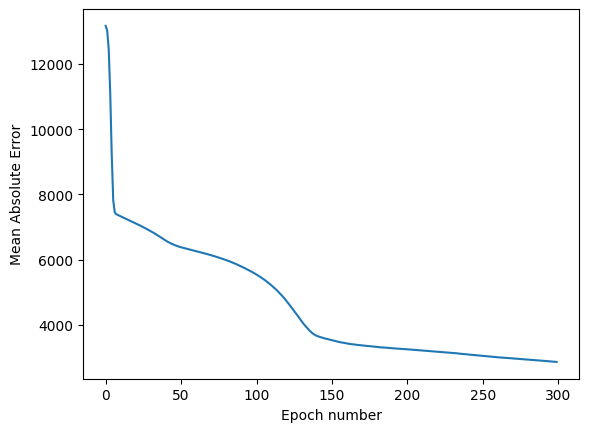

In [95]:
plt.plot(history.history['loss'],label='mean absolute error')
plt.xlabel('Epoch number')
plt.ylabel('Mean Absolute Error')